# face recognition 라이브러리

[face recognition github](https://github.com/ageitgey/face_recognition)

# 강의의 최종 목표!



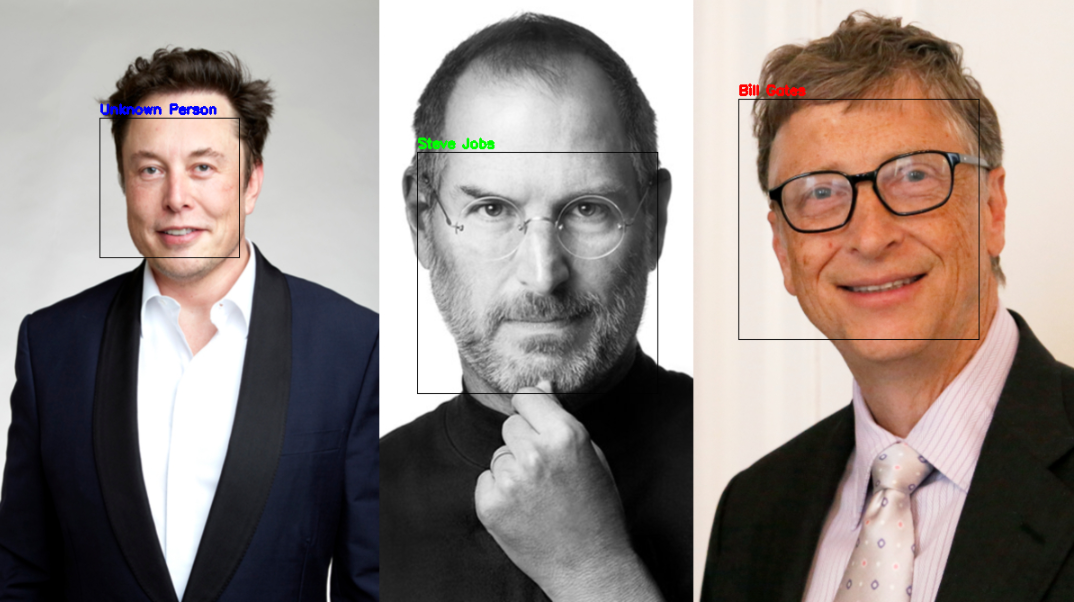

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 36kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ada556590b188fe21a5de804d880518616bbdcd5634079aa2b23b7bdaaf8c9df
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ln -s /content/gdrive/MyDrive/ /mydrive

In [4]:
!ls /mydrive/data/

Airport.mp4	cat2.jpg  cat.jpg   dog3.jpg  jobs.jpg		   Puppies.mp4
bill_gates.jpg	cat3.jpg  dog2.jpg  dog.jpg   Musk_jobs_gates.jpg  Traffic.mp4


# 라이브러리 불러오기



In [5]:
import face_recognition  as fr                # 얼굴인식을 위한 기능
import cv2                                    # 사진의 조작을 위한 기능
import numpy as np                            # 행렬을 처리하는 기능
from google.colab.patches import cv2_imshow   # 코랩에서 imshow를 하기 위한 기능
from PIL import Image                         # 이미지를 크롭해서 가져오기 위한 라이브러리
from IPython.display import Image as Pymage   # 코랩에서 imshow를 하기 위한 기능 Pymage를 한 이유는 PIL과 구분 짓기 위함

# 파일 읽어들이기

fr.load_image_file( ) : 사진을 행렬의 형태로 출력해주게 하는 함수  


In [7]:
image_of_jobs1 = fr.load_image_file('/mydrive/data/jobs.jpg')  # 사진을 로드한다
image_of_jobs1

array([[[ 7,  4, 25],
        [ 7,  4, 25],
        [ 7,  4, 25],
        ...,
        [ 7,  5, 19],
        [ 7,  5, 19],
        [ 7,  5, 19]],

       [[ 7,  4, 25],
        [ 7,  4, 25],
        [ 7,  4, 25],
        ...,
        [ 7,  5, 19],
        [ 7,  5, 19],
        [ 7,  5, 19]],

       [[ 7,  4, 25],
        [ 7,  4, 25],
        [ 7,  4, 25],
        ...,
        [ 7,  5, 19],
        [ 7,  5, 19],
        [ 7,  5, 19]],

       ...,

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 12, 52],
        [13, 12, 52],
        [13, 12, 52]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 12, 52],
        [13, 12, 52],
        [13, 12, 52]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 12, 52],
        [13, 12, 52],
        [13, 12, 52]]], dtype=uint8)

예제1. 행렬로 변환된  image_of_jobs1 를 cv2_imshow 를 이용하여 출력하세요

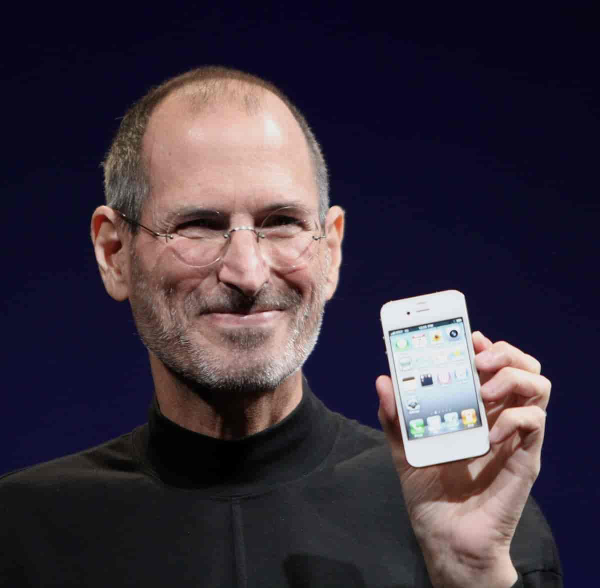

In [12]:
image_of_jobs1_rgb = cv2.cvtColor(image_of_jobs1,cv2.COLOR_RGB2BGR)
image_of_jobs_half = cv2.resize(image_of_jobs1_rgb, dsize=(0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
cv2_imshow(image_of_jobs_half)

# 얼굴의 좌표점 찾기

fr.face_locations(image행렬) : 사진에서 얼굴을 담는 사각형의 좌표를 찾아주는 함수  

좌표 : (top, right, bottom, left)  
결과값 : [ (얼굴1의 좌표), (얼굴2의 좌표), (얼굴3의 좌표) .... ]

In [13]:
import face_recognition as fr

Musk_jobs_gates = fr.load_image_file('/mydrive/data/Musk_jobs_gates.jpg') # 사진을 로드한다
locations = fr.face_locations(Musk_jobs_gates)       # 사진에서 얼굴을 찾아 array의 형태로 반환
print(locations)
print(f'이 사진에 {len(locations)} 명이 있습니다')

[(171, 735, 439, 468), (133, 270, 288, 115), (112, 1092, 379, 825)]
이 사진에 3 명이 있습니다


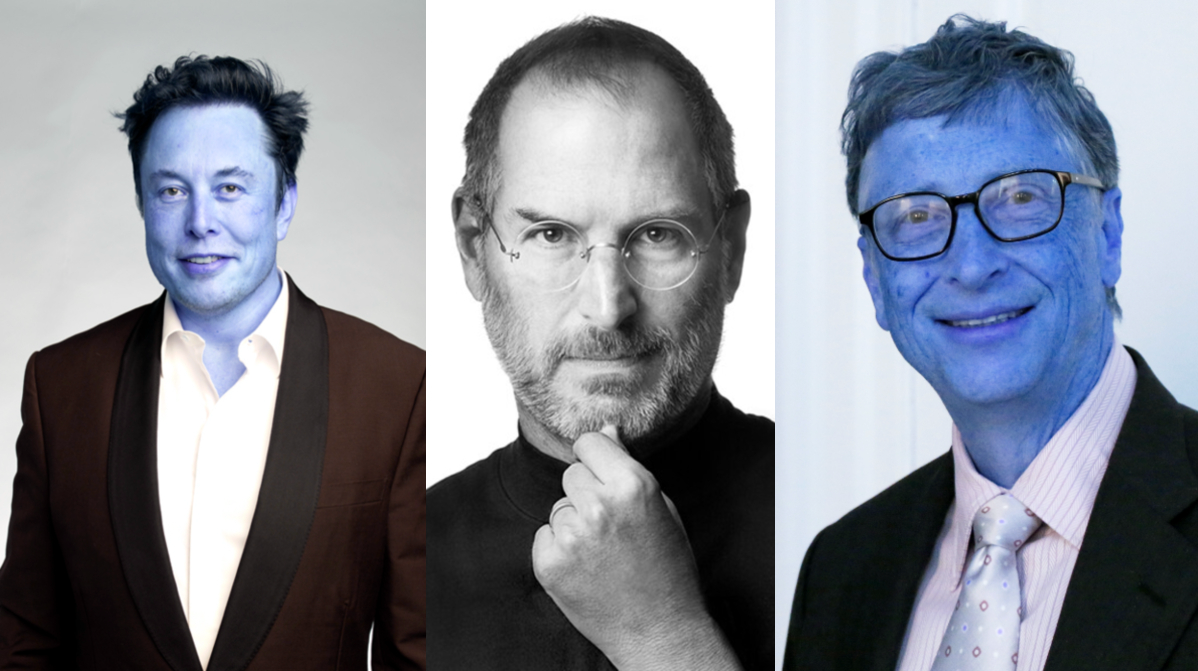

In [14]:
cv2_imshow(Musk_jobs_gates)

#얼굴 사진 잘라내서 출력하기

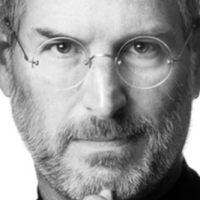

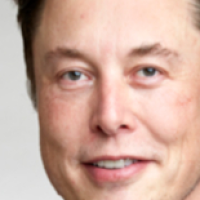

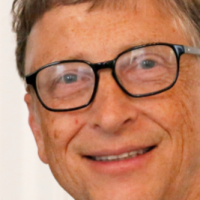

In [15]:
locations = fr.face_locations(Musk_jobs_gates)  

for face_location in locations:  
    top, right, bottom, left = face_location  
    face_image = Musk_jobs_gates[top:bottom, left:right]
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB) # 
    face_image = cv2.resize(face_image, dsize=(200, 200), interpolation=cv2.INTER_AREA) 
    cv2_imshow(face_image)

# 사진 속의 128개 얼굴 특징값 행렬로 찾아내기

fr.face_encodings(image행렬) : 얼굴의 특징점을 잡아주는 함수

행렬의 타입 : (128,)의 np.ndarray  
결과값 : [(얼굴1의 행렬), (얼굴2의 행렬), (얼굴3의 행렬).....]

In [19]:
jobs = fr.load_image_file('/mydrive/data/jobs.jpg')
jobs_encoding = fr.face_encodings(jobs)
print(len(jobs_encoding))

print(jobs_encoding[0].shape)
jobs_encoding[0]


1
(128,)


array([-0.18863371,  0.16414088,  0.09544346, -0.06862199, -0.21912707,
       -0.01166712, -0.07668324, -0.08415144,  0.05850795, -0.01608572,
        0.29816556,  0.03355128, -0.25376788,  0.02322718, -0.04734658,
        0.09539966, -0.10716983, -0.06540553, -0.1566273 , -0.16721022,
        0.00925195,  0.01690976, -0.04237832,  0.01448747, -0.17509508,
       -0.2033423 , -0.02559453, -0.07027626,  0.18936561, -0.17911175,
        0.01236185, -0.04993116, -0.16528051, -0.04240466, -0.00275468,
        0.07454737, -0.06678194, -0.09930804,  0.29607436, -0.03697471,
       -0.10963991,  0.04454324,  0.13372111,  0.20659086,  0.22389176,
       -0.01746763,  0.10105381, -0.09761025,  0.08377893, -0.27030253,
        0.06036445,  0.14909172,  0.11917002,  0.07870468,  0.13551272,
       -0.22898243, -0.0276683 ,  0.15739869, -0.16663048,  0.10309792,
        0.0563923 ,  0.01801104, -0.15765569, -0.07714399,  0.17366053,
        0.11756986, -0.11571022, -0.17275465,  0.1352966 , -0.20

예제2. /mydrive/data/bill_gates.jpg 로 부터 얼굴 특징점 행렬을 추출 하세요

In [22]:
bill = fr.load_image_file('/mydrive/data/bill_gates.jpg')
bill_encoding = fr.face_encodings(bill)[0]
bill_encoding

array([-7.32951313e-02,  6.55294284e-02,  5.22767268e-02, -2.82725766e-02,
       -1.44397542e-01, -5.45491278e-03, -9.21337008e-02, -1.27399772e-01,
        1.07723214e-01, -9.87100974e-02,  1.81637019e-01,  4.90851365e-02,
       -2.79387832e-01, -3.46360430e-02,  5.48078865e-03,  1.03053600e-01,
       -1.53483257e-01, -1.00774854e-01, -1.80077881e-01, -8.05864409e-02,
       -8.84879082e-02,  1.34604573e-02,  7.21089020e-02, -5.46981394e-03,
       -1.58423036e-01, -2.19070643e-01, -1.43536687e-01, -1.50986746e-01,
        1.24069422e-01, -7.84742087e-02,  3.84153500e-02,  3.03400718e-02,
       -1.39183015e-01, -6.65463209e-02,  5.47749400e-02,  1.12635285e-01,
       -7.03713149e-02, -3.99434566e-02,  2.80003190e-01,  1.01326630e-02,
       -2.17365503e-01, -4.11209762e-02,  8.95025283e-02,  1.98437616e-01,
        2.68696666e-01,  2.15137750e-02,  1.42316855e-02, -3.93383689e-02,
        1.19537517e-01, -2.16982484e-01,  1.06076628e-01,  1.66696042e-01,
        2.36722410e-01,  

# 특징점 행렬을 다른 특징점 행렬과 비교하여 유사도 구하기

fr.face_distance([비교할 그룹의 특징점 행렬], (비교할 사람의 특징점 행렬)) : 얼굴간의 유사도 거리를 구하는 함수

결과 값 : 그룹원들과의 유사도 거리 값 (낮을수록 동일인, 평균적으로 0.43 이하면 동일인)

In [25]:
Musk_jobs_gates = fr.load_image_file('/mydrive/data/Musk_jobs_gates.jpg')
Musk_jobs_gates_encoding = fr.face_encodings(Musk_jobs_gates)  # 비교대상군 사진의 128차원 array
len(Musk_jobs_gates_encoding)

3

In [26]:
# face_distance 를 이용한 특징점끼리의 거리를 구할 수 있습니다. 
results_distance = fr.face_distance(Musk_jobs_gates_encoding, bill_encoding)
results_distance

array([0.77704004, 0.85467605, 0.40965584])

# 얼굴 부분에 네모칸과 이름 출력하기

In [28]:
# encoding과 이름들의 array 생성하기
bill = fr.load_image_file('/mydrive/data/bill_gates.jpg')
jobs = fr.load_image_file('/mydrive/data/jobs.jpg')

bill_encoding=fr.face_encodings(bill)[0]
jobs_encoding=fr.face_encodings(jobs)[0]

known_face_encoding = [ bill_encoding,jobs_encoding  ]
known_face_names = ["Bill Gates", "Steve Jobs" ]

color_list = [ (255, 0, 0), (0, 255, 0), (0, 0, 255)]

In [27]:
# 얼굴을 찾기 위한 test image 파일을 로드하기
src = fr.load_image_file('/mydrive/data/Musk_jobs_gates.jpg')

# test image에서 얼굴 찾기
test_location = fr.face_locations(src)

In [29]:
test_location

[(171, 735, 439, 468), (133, 270, 288, 115), (112, 1092, 379, 825)]

[0.76775006 0.42516146]
[0.8360195  0.82589285]
[0.3972358  0.74310155]


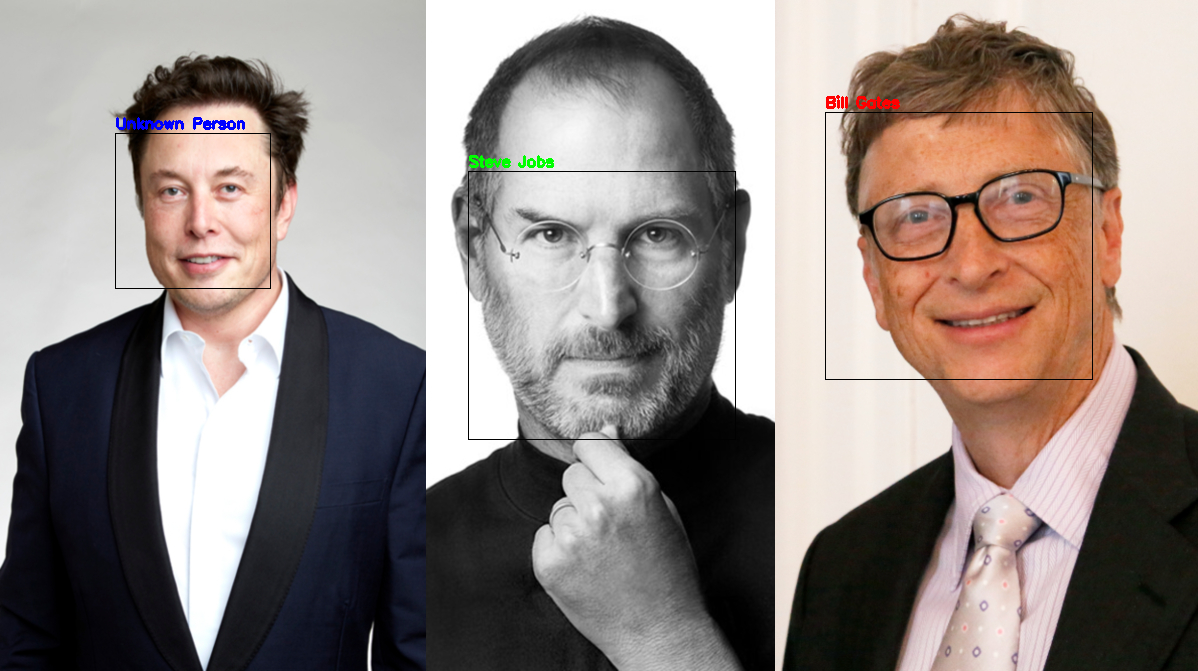

In [35]:
buf = fr.load_image_file('/mydrive/data/Musk_jobs_gates.jpg')

known_face_encoding = [ bill_encoding,jobs_encoding  ]
known_face_names = ["Bill Gates", "Steve Jobs" ]

for (top, right, bottom, left) in test_location:
  unknown = fr.face_encodings(src[top:bottom, left:right])[0]
  face_distance = fr.face_distance(known_face_encoding, unknown)
  print(face_distance)

  if any(face_distance < 0.43): # 
    num = np.argmin(face_distance) # 가장 작은 값의 인덱스 환원
    name = known_face_names[num]
    color2 = color_list[num]

  else: 
    name = "Unknown Person"
    color2 = color_list[-1]

  buf = cv2.rectangle(buf, (left,top ), (right,bottom),(1,1,1),1) # 네모를 그립니다.
  buf = cv2.putText(buf, "{}".format(name),(left,top-5),cv2.FONT_HERSHEY_SIMPLEX, 0.5, color2, 2)

buf = cv2.cvtColor(buf, cv2.COLOR_RGB2BGR)

cv2_imshow(buf)

## 문제. 엘런 머스크의 사진을 구해서 Unknown Person 대신에 Elon Musk라고 출력되게 하시오.